## Part 3: More Pandas and Visualization


A better measure of which department has more majors would be to look at their distribution of enrollment by course level. To do so I created a new column to indicate course level , and then group by this variable to find enrollments by level per department. Remember to exclude from the dataframe all courses that are labs.

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#upload clean version to data frame in order to further investigate data 
df = pd.read_csv("courses-fall2019-clean_version.csv")
df

,Unnamed: 0,crn,course,enrollment,meeting,days,dept
0,0,13587,AFR 105 - 01,24,12:45 PM - 3:25 PM,T,AFR
1,1,15568,AFR 201 - 01,8,6:30 PM - 9:10 PM,M,AFR
2,2,15753,AFR 215 - 01,16,9:55 AM - 11:10 AM,MR,AFR
3,3,15071-15207,AFR 242 - 01,30,9:55 AM - 11:10 AM,TF,AFR
4,4,15570-15571,AFR 264 - 01,19,9:55 AM - 11:10 AM,TF,AFR
...,...,...,...,...,...,...,...
752,752,15323,WRIT 171 - 01,14,9:55 AM - 11:10 AM,MR,WRIT
753,753,14141,WRIT 201 - 01,13,3:45 PM - 5:00 PM,MR,WRIT
754,754,15754-15759,WRIT 277 - 01,15,1:30 PM - 4:10 PM,W,WRIT
755,755,12817-12818,WRIT 307 - 01,13,11:20 AM - 12:35 PM,MR,WRIT


In [3]:
#Get the full course number from the course
course_number = lambda b: b.split(" ")[1]
df['number'] = df['course'].apply(course_number)

In [4]:
#Get the level of the course 
course_level = lambda a: a.split(" ")[1][0]
df['level'] = df['course'].apply(course_level)

In [5]:
#Find the labs in the course
labs = lambda c: c.split(" ")[3][0]
df['isLab'] = df['course'].apply(labs)
df['isLab'] = df['isLab'].replace('0', False)
df = df.drop(df[df['isLab'] == True].index)
#Get rid of all the classes that have a duplicate 
df

,Unnamed: 0,crn,course,enrollment,meeting,days,dept,number,level,isLab
0,0,13587,AFR 105 - 01,24,12:45 PM - 3:25 PM,T,AFR,105,1,False
1,1,15568,AFR 201 - 01,8,6:30 PM - 9:10 PM,M,AFR,201,2,False
2,2,15753,AFR 215 - 01,16,9:55 AM - 11:10 AM,MR,AFR,215,2,False
3,3,15071-15207,AFR 242 - 01,30,9:55 AM - 11:10 AM,TF,AFR,242,2,False
4,4,15570-15571,AFR 264 - 01,19,9:55 AM - 11:10 AM,TF,AFR,264,2,False
...,...,...,...,...,...,...,...,...,...,...
752,752,15323,WRIT 171 - 01,14,9:55 AM - 11:10 AM,MR,WRIT,171,1,False
753,753,14141,WRIT 201 - 01,13,3:45 PM - 5:00 PM,MR,WRIT,201,2,False
754,754,15754-15759,WRIT 277 - 01,15,1:30 PM - 4:10 PM,W,WRIT,277,2,False
755,755,12817-12818,WRIT 307 - 01,13,11:20 AM - 12:35 PM,MR,WRIT,307,3,False


Create a bar chart for each course level, showing only the top 10 majors. So this bar chart should just have the department and the enrollment. 

In [6]:
columns = df.columns
print(columns)

Index(['Unnamed: 0', 'crn', 'course', 'enrollment', 'meeting', 'days', 'dept',
       'number', 'level', 'isLab'],
      dtype='object')


In [7]:
#Drop the unneeded columns
df_new = df.drop(columns=['days','course', 'crn','Unnamed: 0','meeting'])
df_new

,enrollment,dept,number,level,isLab
0,24,AFR,105,1,False
1,8,AFR,201,2,False
2,16,AFR,215,2,False
3,30,AFR,242,2,False
4,19,AFR,264,2,False
...,...,...,...,...,...
752,14,WRIT,171,1,False
753,13,WRIT,201,2,False
754,15,WRIT,277,2,False
755,13,WRIT,307,3,False


In [8]:
total_enrollment = df_new.groupby(['dept','level'], as_index=False).agg({"enrollment": "sum"})
#Do not want the groupby keys to become an index in the new dataframe.
df_bylevel = total_enrollment.pivot_table(index='dept', columns='level', values='enrollment')
#Re-arrange the data frame so that it is organized by department and levels
df_bylevel

level,1,2,3
dept,,,
AFR,24.0,101.0,15.0
AMST,129.0,123.0,14.0
ANTH,63.0,74.0,24.0
ARAB,29.0,27.0,9.0
ARTH,76.0,115.0,60.0
...,...,...,...
SUST,NaN,14.0,NaN
SWA,7.0,4.0,NaN
THST,15.0,78.0,5.0


In [9]:
#Arrange the data frame so that each course level corresponds to total number of students
df_levels = df_bylevel.rename(columns={"1": "100", "2": "200", "3": "300"})
df_levels

level,100,200,300
dept,,,
AFR,24.0,101.0,15.0
AMST,129.0,123.0,14.0
ANTH,63.0,74.0,24.0
ARAB,29.0,27.0,9.0
ARTH,76.0,115.0,60.0
...,...,...,...
SUST,NaN,14.0,NaN
SWA,7.0,4.0,NaN
THST,15.0,78.0,5.0


In [10]:
#Arrange each class level by top enrollment to get get the top 10 most enrolled by level
df_100tops = df_levels.sort_values(by=['100'],ascending=False)
df_200tops = df_levels.sort_values(by=['200'],ascending=False)
df_300tops = df_levels.sort_values(by=['300'],ascending=False)

Text(0.5, 1.0, 'Most Popular Departments by enrollment in 100 Level Courses')

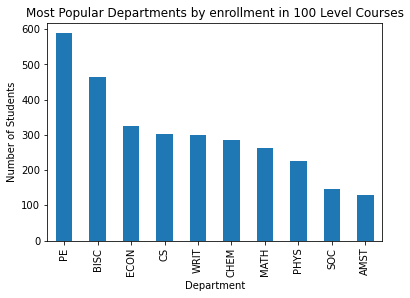

In [11]:
#Data is already arranged by most enrolled so just plot first 10 
level_1_top10 = df_100tops['100'][:10].plot.bar()
level_1_top10.set_xlabel("Department")
level_1_top10.set_ylabel("Number of Students")
plt.title('Most Popular Departments by enrollment in 100 Level Courses')

Text(0.5, 1.0, 'Most Popular Departments by enrollment in 200 Level Courses')

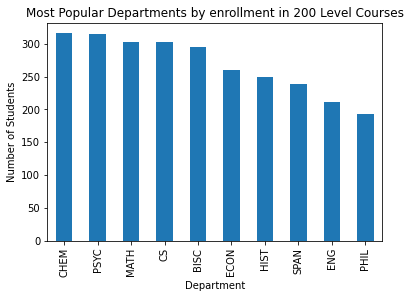

In [12]:
#Data is already arranged by most enrolled so just plot first 10 
level_2_top10 = df_200tops['200'][:10].plot.bar()
level_2_top10.set_xlabel("Department")
level_2_top10.set_ylabel("Number of Students")
plt.title('Most Popular Departments by enrollment in 200 Level Courses')

Text(0.5, 1.0, 'Most Popular Departments by enrollment in 300 Level Courses')

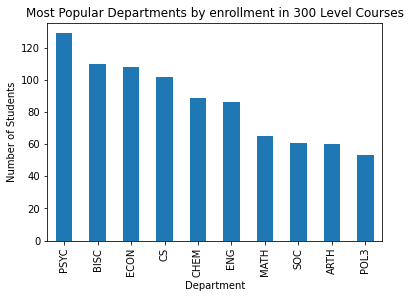

In [13]:
#Data is already arranged by most enrolled so just plot first 10 
level_3_top10 = df_300tops['300'][:10].plot.bar()
level_3_top10.set_xlabel("Department")
level_3_top10.set_ylabel("Number of Students")
plt.title('Most Popular Departments by enrollment in 300 Level Courses')

 Then, create a fourth bar chart that shows the stacked values by course level (also for the top 10 courses).

Text(0.5, 1.0, 'Most Attended Departments')

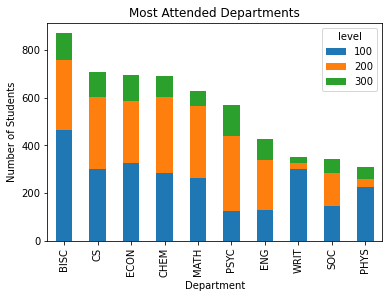

In [16]:
df_levels['sum'] = df_levels['100'] + df_levels['200'] + df_levels['300']
df_levels = df_levels.sort_values(by=['sum'],ascending=False)
df_levels = df_levels.drop(columns = ['sum'])
plot = df_levels[0:10].plot.bar(stacked=True);
#level_3_top10 = df_300tops['300'][:10].plot.bar()


plot.set_xlabel("Department")
plot.set_ylabel("Number of Students")
plt.title('Most Attended Departments')

#### Which departments dominate each chart?

A department present in all the charts whether it's 100 level or 300 level is BISC, but on an individual basis the most popular department for 100 level is PE, for 200 level it is Chem and for 300 it is Psych. 

#### What do the  charts  tell us about which departments  have the most majors?

In order to major in a class you have to take 200 and 300 levels so the popularity in 100 levels is probably not indicative of the popularity of a major. So BISC, CS and ECON are more likely to be the most popular majors where as PHYS is not because it more popilar at the 100 level.
